# Modificaciones Avanzadas

In [4]:
import os
import pandas as pd

## Carga de datos
---

In [5]:
df = pd.read_csv(r"C:\americo\ia_dema\04_Modificaciones_Avanzadas\data2.csv", sep="|", encoding="UTF-8")

In [6]:
df

,Unnamed: 0,Catastro,ReferenciaCP,IdCliente,Producto,Fecha,TipoProducto,AltaCliente
0,106640,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-06-03,Servicio principal,2020-02-16 00:00:00
1,205094,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-05-03,Servicio sin cuota,2020-03-19 00:00:00
2,21253,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-03-03,Servicio principal,2020-01-11 00:00:00
3,149999,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-05-03,Servicio principal,2020-02-26 00:00:00
4,58564,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-05-03,Servicio principal,2020-01-25 00:00:00
...,...,...,...,...,...,...,...,...
13580,191276,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-04-03,Servicio principal,2020-03-14 00:00:00
13581,106294,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-03-03,Servicio sin cuota,2020-02-06 00:00:00
13582,214734,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-04-03,Servicio principal,2020-03-24 00:00:00
13583,175766,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-06-03,Servicio principal,2020-03-07 00:00:00


In [ ]:
#Otra forma más elegante de cargar los datos...
import os

# Cambiar por carpeta donde se encuentren los datos
data_dir = '/content/sample_data/'

path = os.path.join(data_dir, 'data2.csv')
try:
    df = pd.read_csv(path, sep="|")  # para cargar csv tabulados, usar sep="\t"
except Exception as e:
    print(e)

### Corregimos los errores
Si hay errores, comprobamos los siguiente:
* Caracter separador.
* Caracter decimal.
* Codificación.
* Selección de las filas a leer.

[Documentación `read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [7]:
df.head()

,Unnamed: 0,Catastro,ReferenciaCP,IdCliente,Producto,Fecha,TipoProducto,AltaCliente
0,106640,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-06-03,Servicio principal,2020-02-16 00:00:00
1,205094,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-05-03,Servicio sin cuota,2020-03-19 00:00:00
2,21253,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-03-03,Servicio principal,2020-01-11 00:00:00
3,149999,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-05-03,Servicio principal,2020-02-26 00:00:00
4,58564,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-05-03,Servicio principal,2020-01-25 00:00:00


### Exploración inicial

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    13585 non-null  int64 
 1   Catastro      13573 non-null  object
 2   ReferenciaCP  13585 non-null  object
 3   IdCliente     13585 non-null  int64 
 4   Producto      13585 non-null  object
 5   Fecha         13585 non-null  object
 6   TipoProducto  13585 non-null  object
 7   AltaCliente   13585 non-null  object
dtypes: int64(2), object(6)
memory usage: 849.2+ KB


### Corregimos los tipos de datos
Modificamos los datos cargados:
* Seleccionamos las columnas que queremos utilizar.
* Leemos correctamente las columnas de tipo fecha.
* Tipo del resto de columnas.
* Eliminamos la columna 0

In [9]:
df['Catastro'] = df['Catastro'].astype('string')
df['IdCliente'] = df['IdCliente'].astype('string')
df['Producto'] = df['Producto'].astype('category')
df['TipoProducto'] = df['TipoProducto'].astype('category')
df = df.drop(columns="Unnamed: 0")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Catastro      13573 non-null  string  
 1   ReferenciaCP  13585 non-null  object  
 2   IdCliente     13585 non-null  string  
 3   Producto      13585 non-null  category
 4   Fecha         13585 non-null  object  
 5   TipoProducto  13585 non-null  category
 6   AltaCliente   13585 non-null  object  
dtypes: category(2), object(3), string(2)
memory usage: 557.6+ KB


### Corregimos el resto de errores
Si alguna columna no se ha modificado su tipo, puede ser porque contenga errores. Modificamos el tipo indicando que se ignoren los errores.

In [11]:
df['Fecha']

0        2020-06-03
1        2020-05-03
2        2020-03-03
3        2020-05-03
4        2020-05-03
            ...    
13580    2020-04-03
13581    2020-03-03
13582    2020-04-03
13583    2020-06-03
13584    2020-06-03
Name: Fecha, Length: 13585, dtype: object

In [12]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [13]:
df['Fecha'].sort_values()

11970   2020-02-03
11184   2020-02-03
7742    2020-02-03
12926   2020-02-03
7763    2020-02-03
           ...    
6947    2020-06-03
6941    2020-06-03
6935    2020-06-03
6975    2020-06-03
13584   2020-06-03
Name: Fecha, Length: 13585, dtype: datetime64[ns]

In [14]:
df['Fecha'].dt.day.unique()

array([3], dtype=int64)

En realidad son datos mensuales pero los adjudica al día 3 de cada mes.

In [15]:
df["Fecha"] = df["Fecha"] + pd.offsets.Day(-3)

El problema con las fechas es que no es un sistema de medida fijo. 

Hay años bisiestos, los meses tienen diferente tamaño... 

No es tan fácil como agregar 30 días y ya está

Para eso están los 

[Date Offsets](https://pandas.pydata.org/docs/reference/offset_frequency.html)

In [16]:
df["Fecha"]

0       2020-05-31
1       2020-04-30
2       2020-02-29
3       2020-04-30
4       2020-04-30
           ...    
13580   2020-03-31
13581   2020-02-29
13582   2020-03-31
13583   2020-05-31
13584   2020-05-31
Name: Fecha, Length: 13585, dtype: datetime64[ns]

In [17]:
df["Fecha"] = df["Fecha"].dt.to_period("M")

In [18]:
df["Fecha"]

0        2020-05
1        2020-04
2        2020-02
3        2020-04
4        2020-04
          ...   
13580    2020-03
13581    2020-02
13582    2020-03
13583    2020-05
13584    2020-05
Name: Fecha, Length: 13585, dtype: period[M]

In [19]:
df["Fecha"].dt.day.unique()

array([31, 30, 29], dtype=int64)

In [20]:
df["Fecha"] = df["Fecha"].dt.to_timestamp()
df["Fecha"]

0       2020-05-01
1       2020-04-01
2       2020-02-01
3       2020-04-01
4       2020-04-01
           ...    
13580   2020-03-01
13581   2020-02-01
13582   2020-03-01
13583   2020-05-01
13584   2020-05-01
Name: Fecha, Length: 13585, dtype: datetime64[ns]

In [21]:
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [22]:
df["Fecha"]

0       2020-05-01
1       2020-04-01
2       2020-02-01
3       2020-04-01
4       2020-04-01
           ...    
13580   2020-03-01
13581   2020-02-01
13582   2020-03-01
13583   2020-05-01
13584   2020-05-01
Name: Fecha, Length: 13585, dtype: datetime64[ns]

In [23]:
df["AltaCliente"] = pd.to_datetime(df["AltaCliente"], format = "%Y-%m-%d %H:%M:%S")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Catastro      13573 non-null  string        
 1   ReferenciaCP  13585 non-null  object        
 2   IdCliente     13585 non-null  string        
 3   Producto      13585 non-null  category      
 4   Fecha         13585 non-null  datetime64[ns]
 5   TipoProducto  13585 non-null  category      
 6   AltaCliente   13585 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), object(1), string(2)
memory usage: 557.6+ KB


## Exploración y modificación
---

In [25]:
df.head()

,Catastro,ReferenciaCP,IdCliente,Producto,Fecha,TipoProducto,AltaCliente
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19
2,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-02-01,Servicio principal,2020-01-11
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26
4,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-04-01,Servicio principal,2020-01-25


In [30]:
# Renombramos columnas
# Catastro renombrar a CatastroMax
# ReferenciaCP renombrar a CPReferenciado
df = df.rename(columns={'Catastro':'CatastroMax','ReferenciaCP':'CPReferenciado'})

In [31]:
df

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,20
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,20
2,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-02-01,Servicio principal,2020-01-11,01
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,48
4,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-04-01,Servicio principal,2020-01-25,20
...,...,...,...,...,...,...,...,...
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,48
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01
13582,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-03-01,Servicio principal,2020-03-24,20
13583,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-05-01,Servicio principal,2020-03-07,48


Extraemos del Catastro el código de la provincia.

Para ello eliminamos primero todos los espacios y posteriormente extraemos el texto de las posiciones 3 a 4

In [33]:
df['Provincia'] = df['CatastroMax'].str.replace(" ","")


In [34]:
df

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,0872000501120UN02UN0UN
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,0332006900750UN040B0UN
2,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-02-01,Servicio principal,2020-01-11,0080105902010UN060C0UN
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,0024802008896UN040C0UN
4,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-04-01,Servicio principal,2020-01-25,0102007902403UN03CN0UN
...,...,...,...,...,...,...,...,...
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,0054804400046UNPBUN001
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,0050103601575UN020C0UN
13582,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-03-01,Servicio principal,2020-03-24,0012004501209UNUNUNPOR
13583,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-05-01,Servicio principal,2020-03-07,0014802009095UN050C0UN


In [35]:
df['Provincia'] = df['Provincia'].str.slice(3,5)


In [36]:
df.tail()

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,48
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01
13582,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-03-01,Servicio principal,2020-03-24,20
13583,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-05-01,Servicio principal,2020-03-07,48
13584,011 3120101590UN070C0UN,011 3120101590,6111352,N06,2020-05-01,Servicio principal,2020-02-16,31


In [ ]:
df

### Generar variables dummies

Las variables dummy permiten representar información categórica en un formato que pueda ser utilizado por algoritmos de Machine Learning que **requieren entradas numéricas**. Aquí hay algunas razones principales para utilizar variables dummy:

 1. **Adaptación a Algoritmos Numéricos:**
   - Las variables categóricas, que pueden ser texto o etiquetas, no pueden ser procesadas directamente por estos algoritmos. Las variables dummy transforman estas categorías en valores numéricos binarios (0 o 1), lo que permite que los algoritmos las utilicen.

2. **Evitar Relaciones Falsas:**
   - Si se codifican las categorías directamente como números (por ejemplo, "Rojo" = 1, "Verde" = 2, "Azul" = 3), el algoritmo podría interpretar incorrectamente que existe una relación ordinal entre las categorías, como si "Azul" fuera "mejor" que "Verde" o "Rojo". Las variables dummy evitan este problema al representar cada categoría de manera independiente.

3. **Interpretación de Modelos:**
   - Las variables dummy facilitan la interpretación de los resultados del modelo. Por ejemplo, en un modelo de regresión, cada variable dummy representa la influencia de una categoría específica en la variable objetivo, lo que permite una comprensión más clara de cómo cada categoría afecta el resultado.

In [37]:
df_dummies_Producto = pd.get_dummies(df, columns=['Producto'])


In [38]:
df_dummies_Producto.head()

,CatastroMax,CPReferenciado,IdCliente,Fecha,TipoProducto,AltaCliente,Provincia,Producto_N01,Producto_N03,Producto_N04,Producto_N06
0,087 2000501120UN02UN0UN,087 2000501120,6105422,2020-05-01,Servicio principal,2020-02-16,20,1,0,0,0
1,033 2006900750UN040B0UN,033 2006900750,6125687,2020-04-01,Servicio sin cuota,2020-03-19,20,1,0,0,0
2,008 0105902010UN060C0UN,008 0105902010,6098841,2020-02-01,Servicio principal,2020-01-11,01,0,0,0,1
3,002 4802008896UN040C0UN,002 4802008896,6115427,2020-04-01,Servicio principal,2020-02-26,48,0,0,0,1
4,010 2007902403UN03CN0UN,010 2007902403,6103115,2020-04-01,Servicio principal,2020-01-25,20,0,0,1,0


In [39]:
df_dummies_Producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CatastroMax     13573 non-null  string        
 1   CPReferenciado  13585 non-null  object        
 2   IdCliente       13585 non-null  string        
 3   Fecha           13585 non-null  datetime64[ns]
 4   TipoProducto    13585 non-null  category      
 5   AltaCliente     13585 non-null  datetime64[ns]
 6   Provincia       13573 non-null  string        
 7   Producto_N01    13585 non-null  uint8         
 8   Producto_N03    13585 non-null  uint8         
 9   Producto_N04    13585 non-null  uint8         
 10  Producto_N06    13585 non-null  uint8         
dtypes: category(1), datetime64[ns](2), object(1), string(3), uint8(4)
memory usage: 703.4+ KB


In [40]:
df["TipoProducto"].value_counts()

Servicio principal    11010
Servicio sin cuota     2575
Name: TipoProducto, dtype: int64

In [41]:
df_dummies_Producto["TipoProducto"] = df_dummies_Producto["TipoProducto"] == "Servicio principal"

In [42]:
df_dummies_Producto["TipoProducto"].value_counts()

True     11010
False     2575
Name: TipoProducto, dtype: int64

In [43]:
df_dummies_Producto.rename(columns={"TipoProducto":"Cuota"}, inplace=True)

Voy a generar una columna con supuestos datos de facturación

In [44]:
import numpy as np

In [45]:
df_dummies_Producto ['Facturacion'] = np.random.randint(100, 1000, df_dummies_Producto.shape[0])

<Axes: >

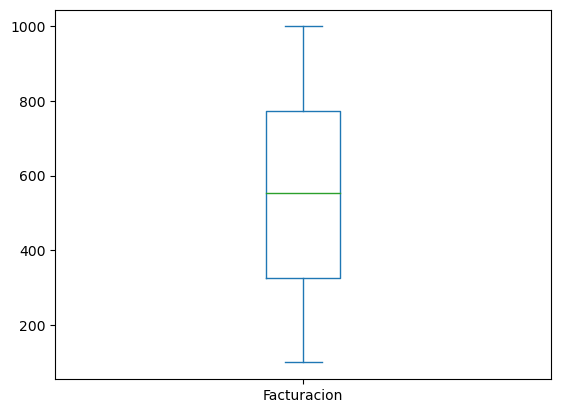

In [46]:
df_dummies_Producto ['Facturacion'].plot(kind="box")

<Axes: ylabel='Density'>

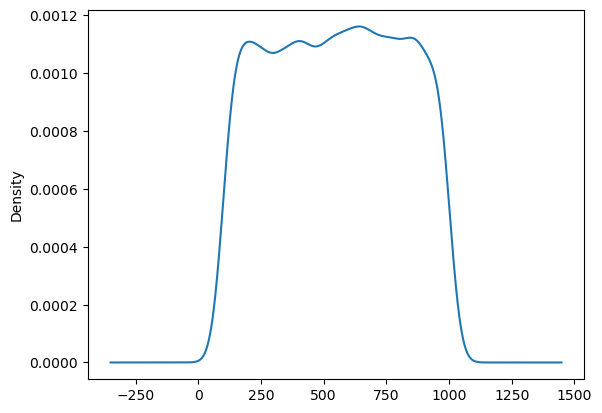

In [47]:
df_dummies_Producto ['Facturacion'].plot(kind="kde")

In [48]:
df_dummies_Producto.head()

,CatastroMax,CPReferenciado,IdCliente,Fecha,Cuota,AltaCliente,Provincia,Producto_N01,Producto_N03,Producto_N04,Producto_N06,Facturacion
0,087 2000501120UN02UN0UN,087 2000501120,6105422,2020-05-01,True,2020-02-16,20,1,0,0,0,726
1,033 2006900750UN040B0UN,033 2006900750,6125687,2020-04-01,False,2020-03-19,20,1,0,0,0,403
2,008 0105902010UN060C0UN,008 0105902010,6098841,2020-02-01,True,2020-01-11,01,0,0,0,1,432
3,002 4802008896UN040C0UN,002 4802008896,6115427,2020-04-01,True,2020-02-26,48,0,0,0,1,847
4,010 2007902403UN03CN0UN,010 2007902403,6103115,2020-04-01,True,2020-01-25,20,0,0,1,0,301


In [49]:
df_dummies_Producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CatastroMax     13573 non-null  string        
 1   CPReferenciado  13585 non-null  object        
 2   IdCliente       13585 non-null  string        
 3   Fecha           13585 non-null  datetime64[ns]
 4   Cuota           13585 non-null  bool          
 5   AltaCliente     13585 non-null  datetime64[ns]
 6   Provincia       13573 non-null  string        
 7   Producto_N01    13585 non-null  uint8         
 8   Producto_N03    13585 non-null  uint8         
 9   Producto_N04    13585 non-null  uint8         
 10  Producto_N06    13585 non-null  uint8         
 11  Facturacion     13585 non-null  int32         
dtypes: bool(1), datetime64[ns](2), int32(1), object(1), string(3), uint8(4)
memory usage: 756.3+ KB


In [50]:
df_dummies_Producto_num = df_dummies_Producto.select_dtypes(["number", "datetime", "bool"])
df_dummies_Producto_num

,Fecha,Cuota,AltaCliente,Producto_N01,Producto_N03,Producto_N04,Producto_N06,Facturacion
0,2020-05-01,True,2020-02-16,1,0,0,0,726
1,2020-04-01,False,2020-03-19,1,0,0,0,403
2,2020-02-01,True,2020-01-11,0,0,0,1,432
3,2020-04-01,True,2020-02-26,0,0,0,1,847
4,2020-04-01,True,2020-01-25,0,0,1,0,301
...,...,...,...,...,...,...,...,...
13580,2020-03-01,True,2020-03-14,0,0,0,1,153
13581,2020-02-01,False,2020-02-06,1,0,0,0,489
13582,2020-03-01,True,2020-03-24,0,0,0,1,770
13583,2020-05-01,True,2020-03-07,1,0,0,0,591


In [52]:
df_dummies_Producto_num.drop(columns="AltaCliente", inplace=True)

KeyError: "['AltaCliente'] not found in axis"

In [53]:
df_dummies_Producto_num['IdCliente'] = df_dummies_Producto['IdCliente']


In [54]:
df_productos_cliente = df_dummies_Producto_num.groupby(['IdCliente', "Fecha"]).sum().reset_index()


In [56]:
df_productos_cliente.head()

,IdCliente,Fecha,Cuota,Producto_N01,Producto_N03,Producto_N04,Producto_N06,Facturacion
0,100787,2020-04-01,1,0,0,0,1,773
1,101376,2020-04-01,1,0,0,0,1,710
2,1018161,2020-04-01,1,0,0,0,1,486
3,103899,2020-04-01,1,0,0,1,0,836
4,103899,2020-05-01,1,0,0,1,0,713


In [57]:
df_dummies_Producto_num.shape, df_productos_cliente.shape

((13585, 8), (13059, 8))

## Consultas a dataframes con .query()
[Documentación `.query()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)
---

In [58]:
df["AltaCliente"].dt.weekday

0        6
1        3
2        5
3        2
4        5
        ..
13580    5
13581    3
13582    1
13583    5
13584    6
Name: AltaCliente, Length: 13585, dtype: int64

In [59]:
df["AltaCliente"].dt.weekday == 2

0        False
1        False
2        False
3         True
4        False
         ...  
13580    False
13581    False
13582    False
13583    False
13584    False
Name: AltaCliente, Length: 13585, dtype: bool

In [60]:
df.query('AltaCliente.dt.weekday == 2')

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,48
7,005A2007401640UN030C0UN,005A2007401640,2305530,N04,2020-03-01,Servicio principal,2020-02-12,A2
11,004 2003201842UN040A0UN,004 2003201842,6122564,N04,2020-03-01,Servicio principal,2020-03-18,20
15,002A4804300015UN02DR0UN,002A4804300015,6102122,N06,2020-03-01,Servicio principal,2020-01-29,A4
26,008 2005502340UN04DR0UN,008 2005502340,6116007,N01,2020-04-01,Servicio sin cuota,2020-02-26,20
...,...,...,...,...,...,...,...,...
13546,008 4808200026UN01EX0DR,008 4808200026,620616,N06,2020-03-01,Servicio principal,2020-03-25,48
13556,014 4801300805UN01CN0UN,014 4801300805,3462093,N06,2020-05-01,Servicio principal,2020-03-04,48
13567,019 4800100078UN190A0UN,019 4800100078,6135789,N01,2020-04-01,Servicio sin cuota,2020-04-29,48
13573,032B4804600076UN01DR0UN,032B4804600076,6102785,N04,2020-02-01,Servicio principal,2020-01-29,B4


### Contrataciones del primer trimestre

In [61]:
df.query('AltaCliente.dt.month <= 3')

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,20
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,20
2,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-02-01,Servicio principal,2020-01-11,01
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,48
4,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-04-01,Servicio principal,2020-01-25,20
...,...,...,...,...,...,...,...,...
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,48
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01
13582,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-03-01,Servicio principal,2020-03-24,20
13583,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-05-01,Servicio principal,2020-03-07,48


Dos condiciones simultáneas

In [62]:
df['IdCliente'] = df['IdCliente'].astype('int')

In [63]:
df.query('AltaCliente.dt.month <= 3 and IdCliente<100000')

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
112,033 2006902990UNUNUNPOR,033 2006902990,45810,N06,2020-05-01,Servicio principal,2020-03-24,20
284,027 2006906120UN010A0UN,027 2006906120,94619,N06,2020-04-01,Servicio sin cuota,2020-02-23,20
320,011 4801301560UN030C0UN,011 4801301560,22248,N06,2020-05-01,Servicio principal,2020-03-13,48
371,009A4804400124UNUNUN0UN,009A4804400124,52219,N06,2020-03-01,Servicio principal,2020-03-24,A4
534,021 4801300040UN03IZ0UN,021 4801300040,43543,N04,2020-05-01,Servicio principal,2020-01-09,48
...,...,...,...,...,...,...,...,...
13446,017 2006902170UN010D0UN,017 2006902170,38243,N01,2020-03-01,Servicio sin cuota,2020-01-31,20
13453,074 0105902310UN06CN0UN,074 0105902310,98592,N01,2020-04-01,Servicio principal,2020-02-01,01
13549,002 2005502480UN01DR0UN,002 2005502480,49833,N04,2020-01-01,Servicio principal,2020-01-05,20
13560,008 4800300164UN02UN00A,008 4800300164,76072,N04,2020-02-01,Servicio principal,2020-03-01,48


### Consultas más complejas

Usando variables

In [64]:
producto = 'N01'
df.query('AltaCliente.dt.month <= 3 and Producto == @producto')

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,20
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,20
10,026 4802003260UN080D0UN,026 4802003260,4163892,N01,2020-05-01,Servicio sin cuota,2020-01-19,48
13,016 0819600232UNLOUN001,016 0819600232,6106541,N01,2020-05-01,Servicio principal,2020-02-02,08
14,014 3114900001UN050A0UN,014 3114900001,6099661,N01,2020-04-01,Servicio principal,2020-01-16,31
...,...,...,...,...,...,...,...,...
13552,003 4801300650UN040D0UN,003 4801300650,6128374,N01,2020-04-01,Servicio principal,2020-03-28,48
13555,012A2008001170UN040A0UN,012A2008001170,6111046,N01,2020-03-01,Servicio sin cuota,2020-02-14,A2
13570,003 2008001350UN040H0UN,003 2008001350,6103683,N01,2020-02-01,Servicio principal,2020-02-01,20
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01


In [65]:
producto = 'N01'
tipoprod = 'Servicio sin cuota'
df.query('AltaCliente.dt.month <= 3 and (Producto == @producto or TipoProducto == @tipoprod)')

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,20
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,20
10,026 4802003260UN080D0UN,026 4802003260,4163892,N01,2020-05-01,Servicio sin cuota,2020-01-19,48
13,016 0819600232UNLOUN001,016 0819600232,6106541,N01,2020-05-01,Servicio principal,2020-02-02,08
14,014 3114900001UN050A0UN,014 3114900001,6099661,N01,2020-04-01,Servicio principal,2020-01-16,31
...,...,...,...,...,...,...,...,...
13561,040 3109700650UN02UN0UN,040 3109700650,4234135,N06,2020-05-01,Servicio sin cuota,2020-03-27,31
13568,005 3120103015UNPB0B0UN,005 3120103015,6115786,N06,2020-05-01,Servicio sin cuota,2020-02-23,31
13570,003 2008001350UN040H0UN,003 2008001350,6103683,N01,2020-02-01,Servicio principal,2020-02-01,20
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01


### Facturación media del mes de abril del 2020

In [66]:
df['Facturacion'] = np.random.randint(100, 1000, df.shape[0])

In [71]:
df

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia,Facturacion
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,20,271
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,20,756
2,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-02-01,Servicio principal,2020-01-11,01,577
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,48,637
4,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-04-01,Servicio principal,2020-01-25,20,939
...,...,...,...,...,...,...,...,...,...
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,48,647
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01,715
13582,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-03-01,Servicio principal,2020-03-24,20,852
13583,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-05-01,Servicio principal,2020-03-07,48,734


### Facturación maxima y minima para Producto N06 de los clientes que no pertenezcan a Bizkaia

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13585 entries, 0 to 13584
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CatastroMax     13573 non-null  string        
 1   CPReferenciado  13585 non-null  object        
 2   IdCliente       13585 non-null  int32         
 3   Producto        13585 non-null  category      
 4   Fecha           13585 non-null  datetime64[ns]
 5   TipoProducto    13585 non-null  category      
 6   AltaCliente     13585 non-null  datetime64[ns]
 7   Provincia       13573 non-null  string        
 8   Facturacion     13585 non-null  int32         
dtypes: category(2), datetime64[ns](2), int32(2), object(1), string(2)
memory usage: 663.8+ KB


In [72]:
df['Provincia'] = df['Provincia'].astype('string')

In [73]:
df

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia,Facturacion
0,087 2000501120UN02UN0UN,087 2000501120,6105422,N01,2020-05-01,Servicio principal,2020-02-16,20,271
1,033 2006900750UN040B0UN,033 2006900750,6125687,N01,2020-04-01,Servicio sin cuota,2020-03-19,20,756
2,008 0105902010UN060C0UN,008 0105902010,6098841,N06,2020-02-01,Servicio principal,2020-01-11,01,577
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,48,637
4,010 2007902403UN03CN0UN,010 2007902403,6103115,N04,2020-04-01,Servicio principal,2020-01-25,20,939
...,...,...,...,...,...,...,...,...,...
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,48,647
13581,005 0103601575UN020C0UN,005 0103601575,6109233,N01,2020-02-01,Servicio sin cuota,2020-02-06,01,715
13582,001 2004501209UNUNUNPOR,001 2004501209,2239094,N06,2020-03-01,Servicio principal,2020-03-24,20,852
13583,001 4802009095UN050C0UN,001 4802009095,6119594,N01,2020-05-01,Servicio principal,2020-03-07,48,734


In [76]:
df2 = df.query('Provincia =="48"')

In [77]:
df2

,CatastroMax,CPReferenciado,IdCliente,Producto,Fecha,TipoProducto,AltaCliente,Provincia,Facturacion
3,002 4802008896UN040C0UN,002 4802008896,6115427,N06,2020-04-01,Servicio principal,2020-02-26,48,637
6,078 4802004120UN07IZ0UN,078 4802004120,6100111,N04,2020-04-01,Servicio principal,2020-01-18,48,424
9,004 4802008720UNPBUN001,004 4802008720,6133971,N06,2020-04-01,Servicio principal,2020-04-18,48,773
10,026 4802003260UN080D0UN,026 4802003260,4163892,N01,2020-05-01,Servicio sin cuota,2020-01-19,48,450
12,008 4807800250UN040C0UN,008 4807800250,409451,N06,2020-04-01,Servicio principal,2020-04-26,48,956
...,...,...,...,...,...,...,...,...,...
13572,008 4808000092UN01IZ0UN,008 4808000092,6105510,N06,2020-02-01,Servicio principal,2020-01-30,48,848
13574,070 4802005015UN030B0UN,070 4802005015,6125476,N06,2020-03-01,Servicio principal,2020-03-18,48,421
13577,004 4890200004UN020E0UN,004 4890200004,6106187,N04,2020-03-01,Servicio principal,2020-02-06,48,138
13580,005 4804400046UNPBUN001,005 4804400046,75816,N06,2020-03-01,Servicio principal,2020-03-14,48,647


In [78]:
df2["Facturacion"].max()

999

In [79]:
df2["Facturacion"].min()

100